# 1. Deep Learning Basics

- = subdomain of Machine Learning which mimics the brain
- = Neural Networks

## Introduction to neural networks

### My first neuron

Imagine that our problem is a binary classification task: cat or dog?

In [69]:
# target y set to 1
y = 1

we have 4 features per observation x1, x2, x3 and x4

In [70]:
# input X = one single observation, 4 features (x1, x2, x3, x4)
X = [1., -3.1, -7.2, 2.1]

Imagine that you have a linear regression with weights (2.1, -1,2, 0.3, 1.3) and 1 `intercept` (-3)

In [71]:
def linreg_1(X):
    return -3 + 2.1*X[0] - 1.2*X[1] + 0.3*X[2] + 1.3*X[3]

In [72]:
output_1 = linreg_1(X)
output_1

3.39

Now let's transform this output through an `activation function`:

In [73]:
def activation(x):
    if x > 0:
        return x
    else:
        return 0

In [74]:
output_1 = activation(output_1)

In [75]:
output_1

3.39

We managed to build a `neuron` with :

 - single input that has different features
 - weights + bias (a linear regression)
 - a non-linear activation function

### Activation Functions

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
x = np.arange(-10, 10, 0.1)

#### Sigmoid

In [78]:
sigmoid = 1/(1+np.exp(-x))

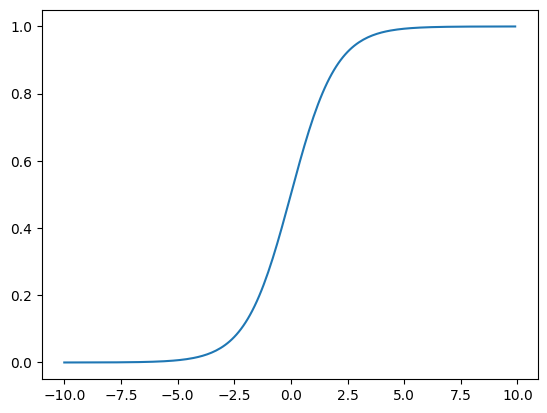

In [79]:
plt.plot(x, sigmoid)

### Tanh

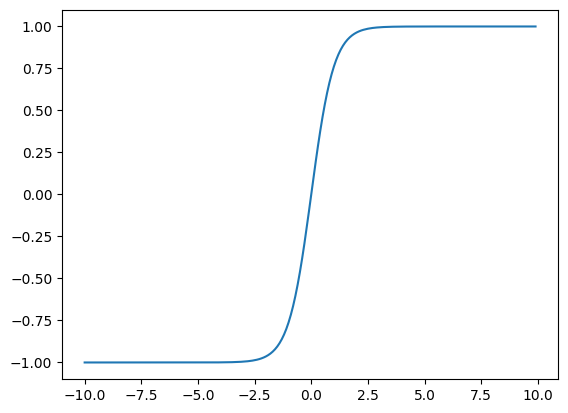

In [80]:
tanh = np.tanh(x)
plt.plot(x, tanh)

### ReLU (Rectified Linear Unit)

In [81]:
relu = pd.Series(x).map(lambda x: x if x > 0 else 0)

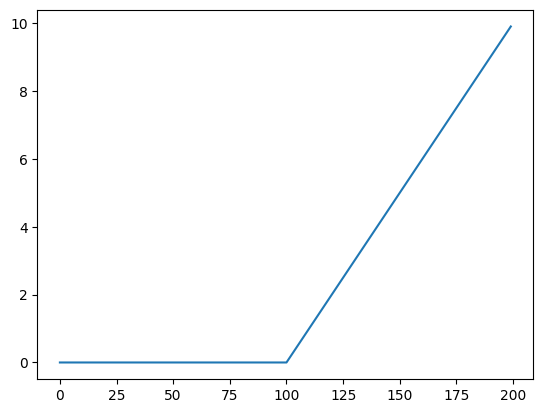

In [82]:
plt.plot(relu)

### Leaky ReLU

In [83]:
def leaky_relu(x):
    if x > 0.1*x:
        return x
    else:
        return 0.1*x

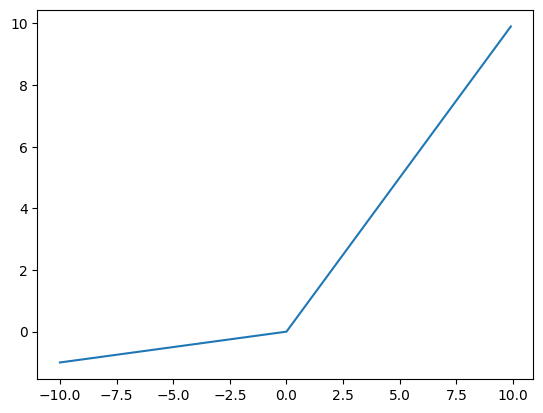

In [84]:
leaky = pd.Series(x).map(leaky_relu)
plt.plot(x, leaky)

### ELU (Expoonential Linear Unit)

In [85]:
def elu(x, alpha=1):
    if x>=0:
        return x
    else:
        return alpha*(np.exp(x)-1)

In [86]:
elu = pd.Series(x).map(elu)

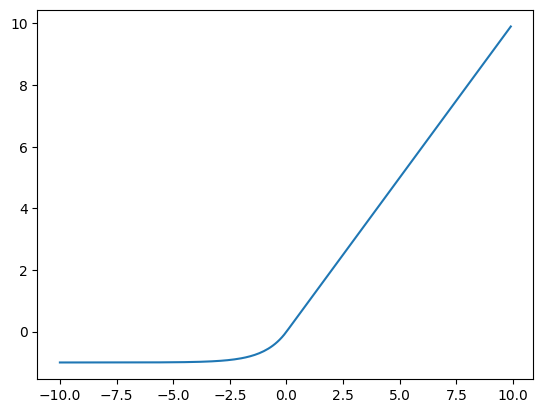

In [87]:
plt.plot(x, elu)

### My first layer of neurons

Now, imagine that you have another linear regression with 4 weights (-0.1, 1.2, 4.9, -3.1) and 1 `intercept` (-5)

We would like to produce another output_2 (a second neuron):
- from the same input, applying this second linear regression
- using the same activation function on top of this regression

In [88]:
def linreg_2(X):
    return -5 - 0.1*X[0] + 1.2*X[1] + 4.9*X[2] - 3.1*X[3]

output_2 = linreg_2(X)

In [89]:
#this reular output
output_2

-50.61

In [90]:
# if we use the activation function
output_2 = activation(output_2)
output_2

0

And a third one

In [91]:
def linreg_3(X):
    return -8 + 0.4*X[0] + 2.6*X[1] +- 2.5*X[2] + 3.8*X[3]

output_3 = linreg_3(X)
output_3

10.32

In [92]:
output_3 = activation(linreg_3(X))
output_3

10.32

## My second layer of neurons

- We've just built our first 3 neurons
- What if I would like to use those 3 neurons as inputs for a second layer of neurons?

The process is exactly the same.
Let's consider a linear regression with 3 `weights` (1.1, -4.1, -0.7) and 1 `intercept` (5.1)

In [93]:
def linreg_next_layer(X):
    return 5.1 + 1.1*X[0] - 4.1*X[1] - 0.7*X[2]

In [94]:
first_layer = [output_1, output_2, output_3]

In [95]:
output_second_layer = linreg_next_layer(first_layer)
output_second_layer

1.6050000000000013

Now let's `activate` this and turn it into a neuron using the sigmoid activator for instance as we were simulation a `binary classification task`

In [96]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [97]:
output_second_layer = sigmoid(output_second_layer)
output_second_layer

0.832716044461517